| Project name   |  Water Reservoir Levels |
|:----------|:-------------|
| **Autor(S)**| 33162, Juan De la Torre<br> 27001, Carlos Rincon<br> 18821, Alberto Ortega |
| **Editor**|Dr. Adán Hirales Carbajal|
| **Last update** | 12/01/2022 |

### <span style="color:blue">Problem statement</span>

In the past years, potable water disponibility has been decreasing in our region, the Baja California/California zone is commonly known for its arid climate and scarce rains, making it hard to maintain constant levels in the water dams of the state. To this natural problem source we can aggregate bad use and nonexistent water saving culture from its users. To combat these problems, the local government has implemented generalized water cuts, thus creating another problematic: Water Reservoir tank usage.

We have been heavily relying on our water reservoirs due these problems. However there isn’t much information available on how much water is left in our reservoirs. With the constant demand in the California and Baja California for drinkable water and regular water, it’s only a matter of time that we dry up our reservoirs. 
We planned a hardware/software solution. Create a device that measures water level in the reservoir, and use flow meters to unsecure its correct function. For this we have selected the stm32 board as a development board, two sensors: an analog flow meter, and a digital sonic sensor for water level, and a communication interface. We are going to use this hardware in the client site (at the water reservoir), and with help from the communications module, transmit it to another server device, where it will receive the quantitative information, giving its users the information needed to know if the reservoir is working correctly.

The STM will use FreeRTOS to manage all the sensors and to interpret the data collected.


### <span style="color:blue">Hardware requirements</span>


|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|STM32 F767ZI|1| Development board|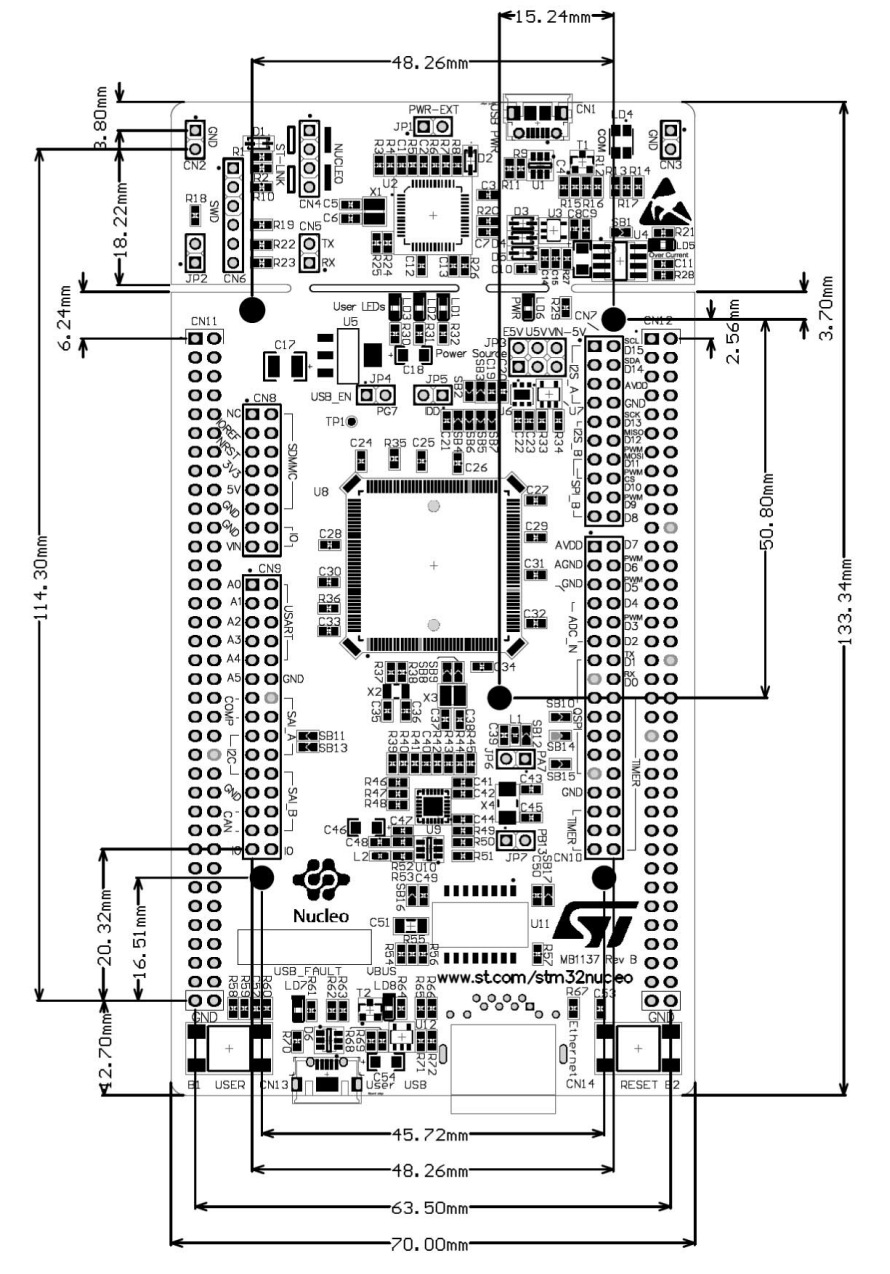|


|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|JSN-SR04T V3.0| 1| The JSN-SR04T Waterproof Ultrasonic Range Finder uses ultrasonic waves to detect the presence of and measure the distance to objects in front of it.|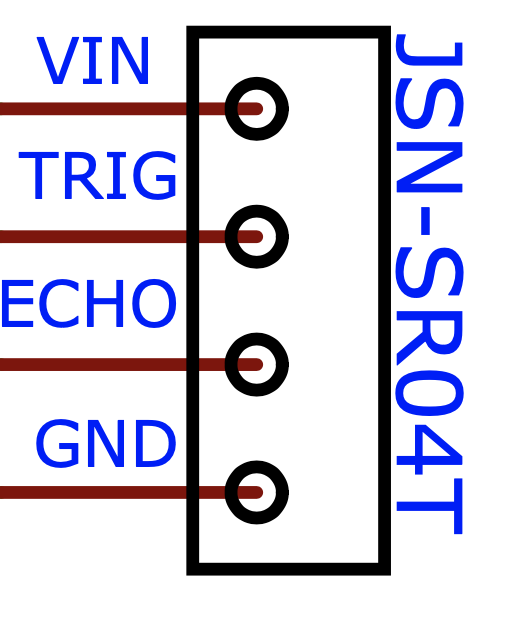|

|Component|Quantity|Characteristics|Component|
|:---|:---|:-----|:---:|
|Waterflow sensor YF-B5|1|analog water flow meter, it consists of a copper body, a water rotor, and a hall-effect sensor. When water flows through the rotor, rotor rolls. Its speed changes with different rate of flow. The hall-effect sensor outputs the corresponding pulse signal.| 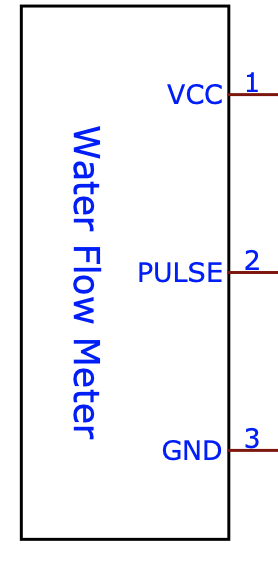|

### <span style="color:blue">hardware schematic</span>


   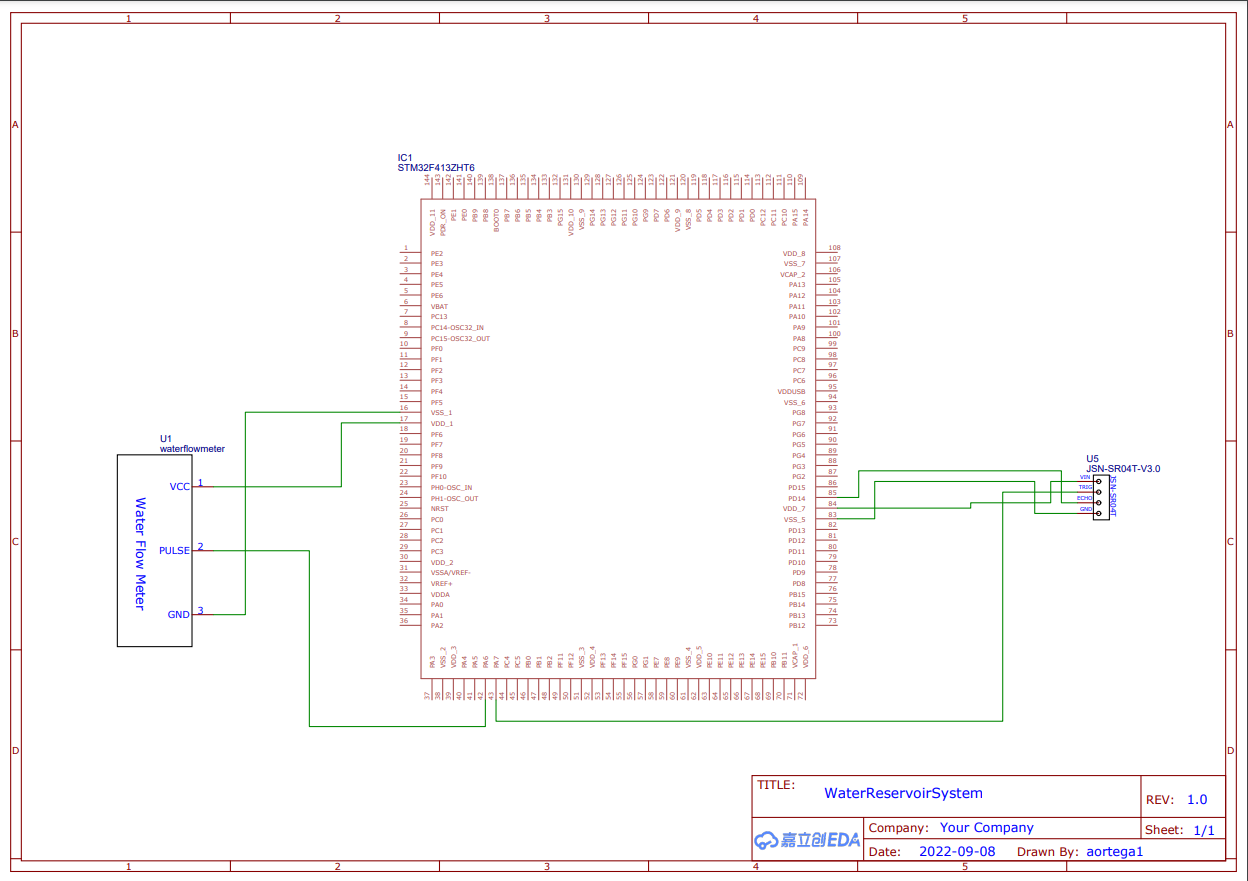


### <span style="color:blue">Hardware layout</span>

| | |
|:--:|:--:|
|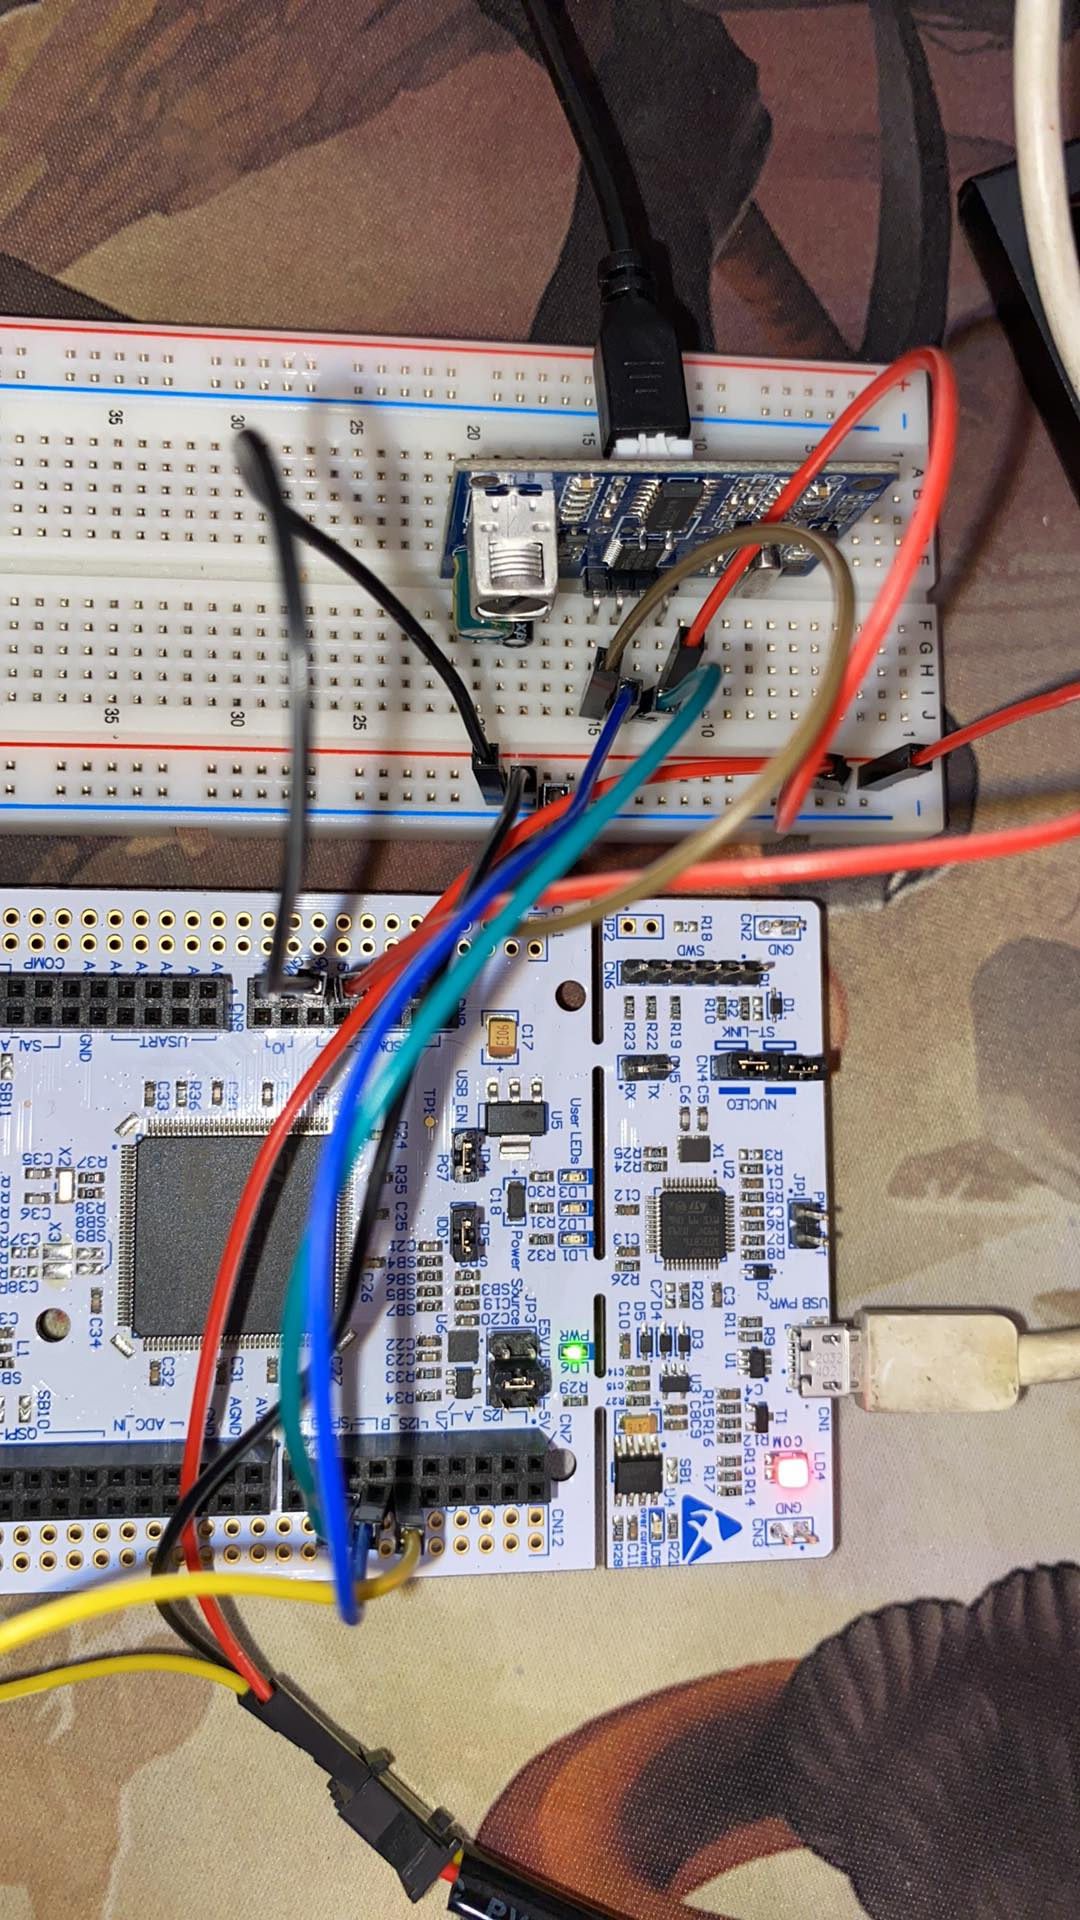 |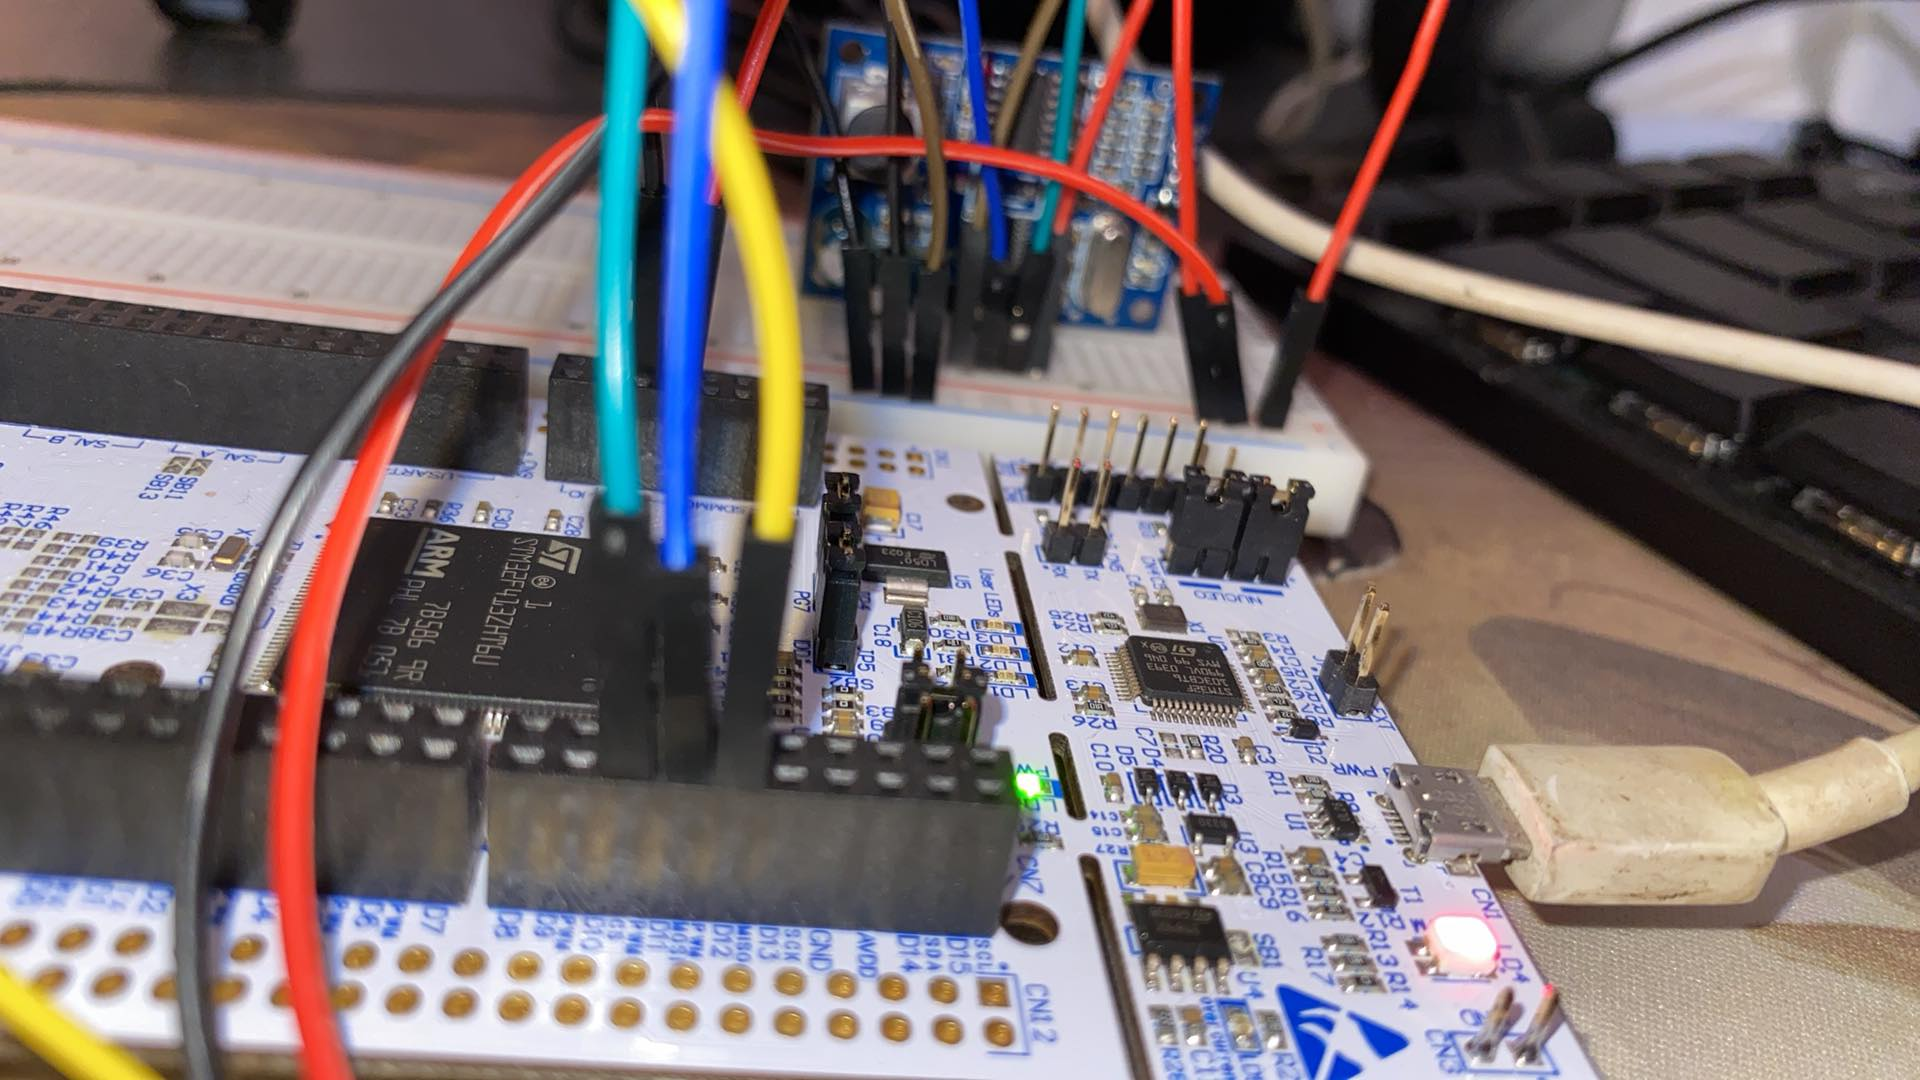|
|Installed hardware |Connection to board|
|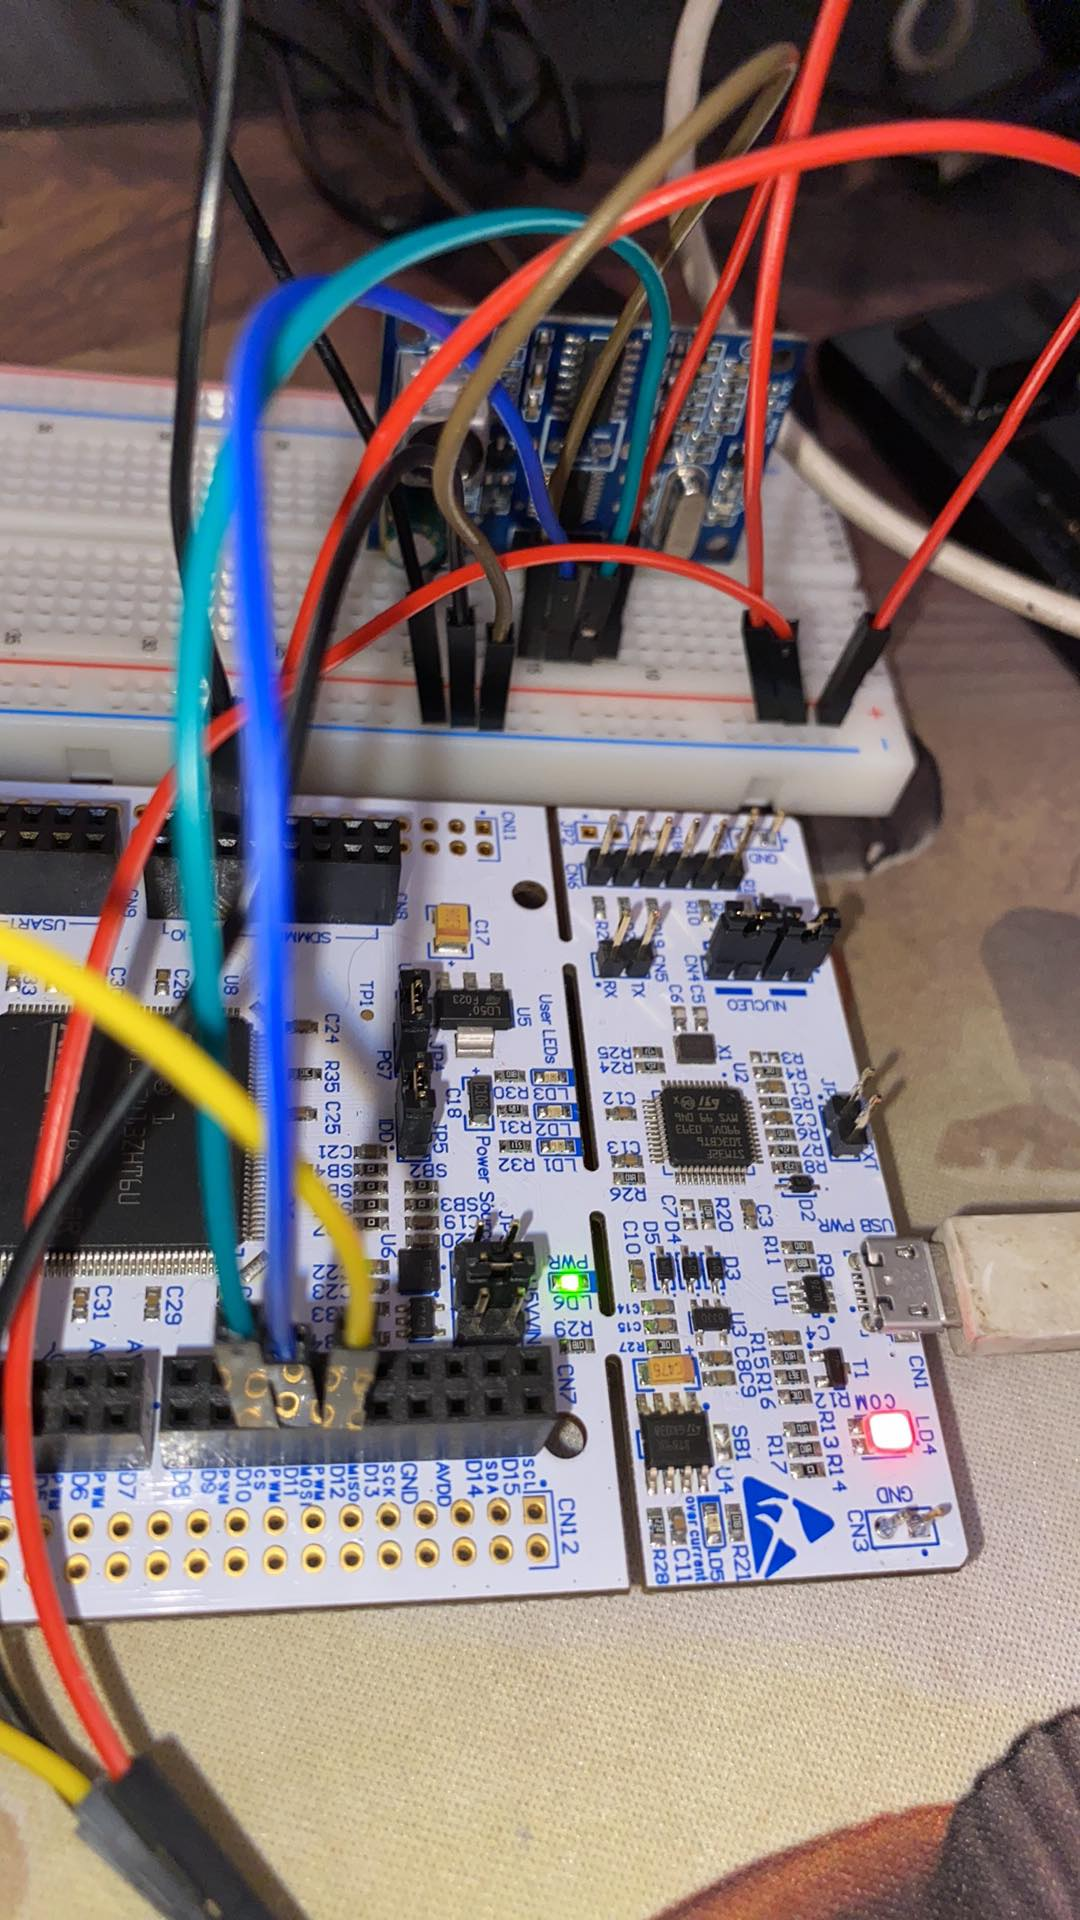|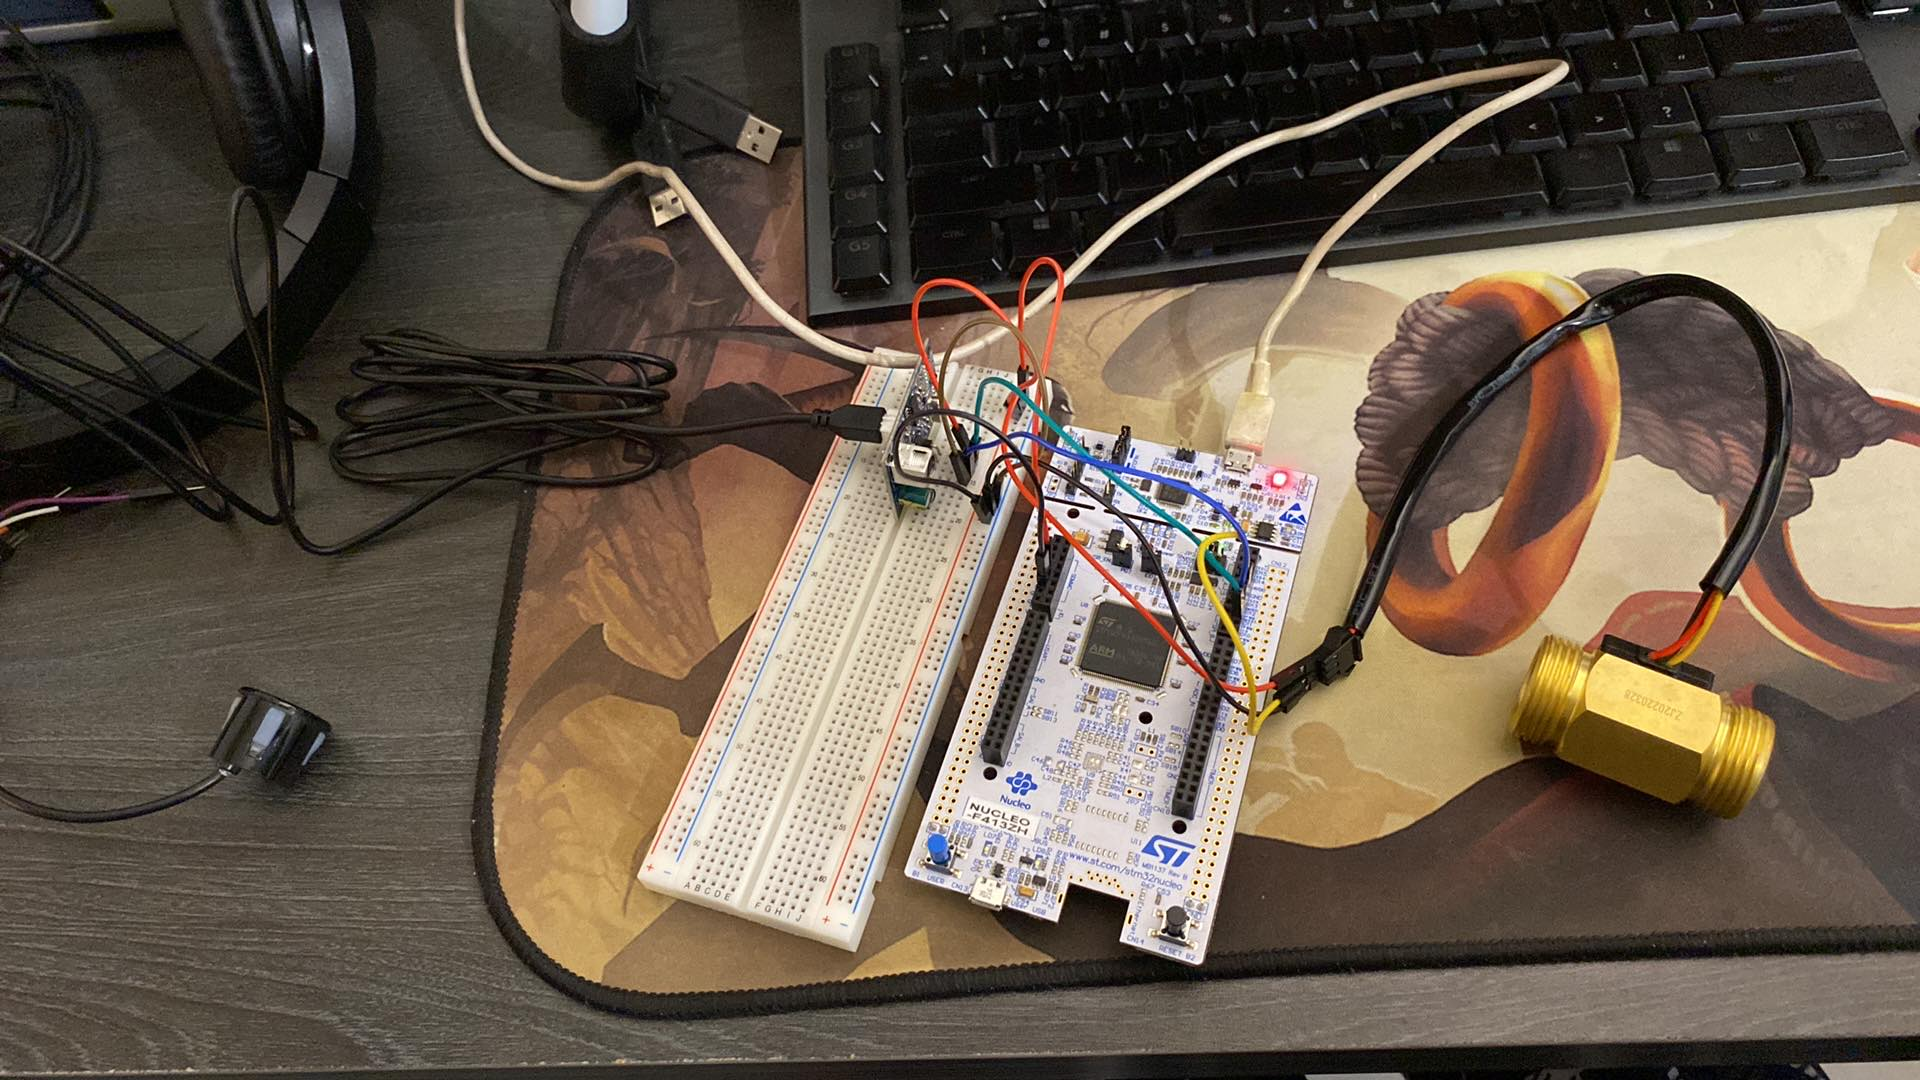|
|Read data to STM32 |Done with the setup|


### <span style="color:blue">CubeMX parameters</span>

The CubeMx section is currently in progress and will be updated until the next update.

| Class   |  Attribute | Value
|:-----------|:-------------|:-------------|
| **Project**| Name | Water Reservoir |
|     | Clock | 16Mhz
|     | Timebase Source | TM1 |
| **STM32 PINS** | PA7, PA6, PB7, PB6, PA14, PA13, PD14, PA7, PH0, PH1, PD9, PD8 | Set PB7 to I2C1_SDA, PB6 to I2C1_SCL, PA14_JTCK-SWCLK, PA13 to SYS_JTMS-SWDIO, PD14 to GPIO_Output, PA7 & PA6 to GPIO_Input, PH0 to RCC_OSC_IN, PH1 to RCC_OSC_OUT, PD9 to USART3_RX, PD8 to USART3_TX |
| **FreeRTOS** | API | CMSIS V1  |
| **Task/Interrupt   Type** | **Name  Entry Function** | **$w_j$     $p_j$    Port** |
| 1 Persistent | Water Flow Sensor | WFSTask_init  osPriority Normal 1 PA6|
| 2 Persistent | Ultra Sonic Sensor | USSTask_init  osPriority Normal 1 PA7, PA14|
| 3 Persistent | Communications | CommTask_init  osPriority Normal 1 PD9, PD8|

### <span style="color:blue">Static Model</span>
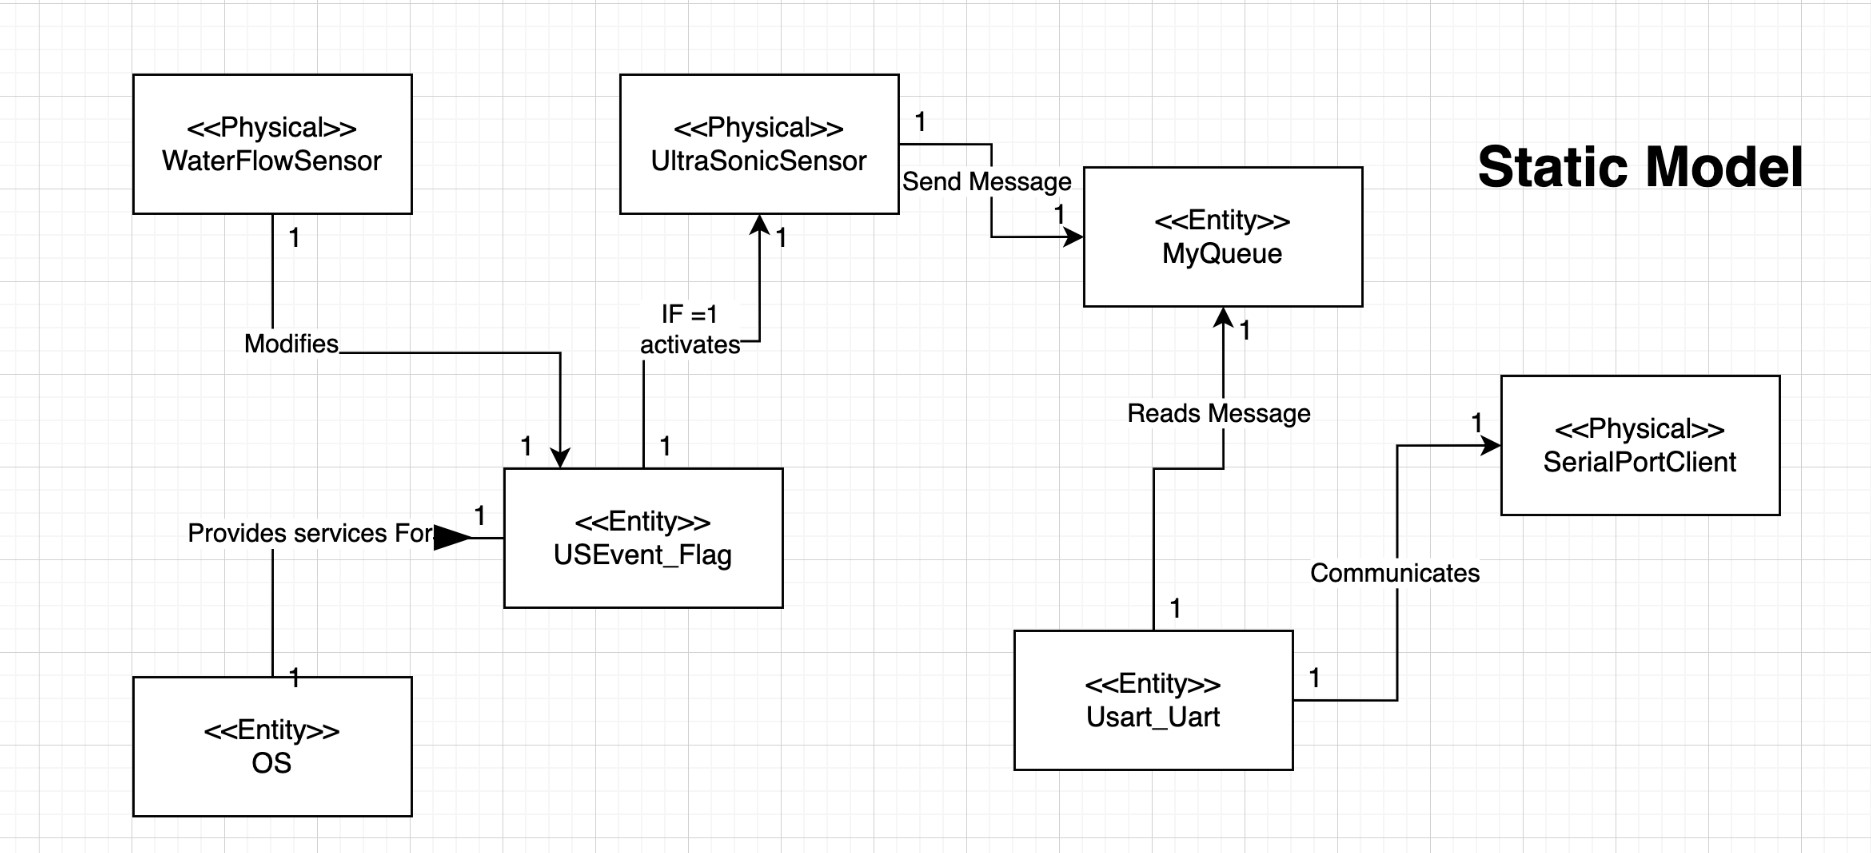

### <span style="color:blue">Control Diagram</span>
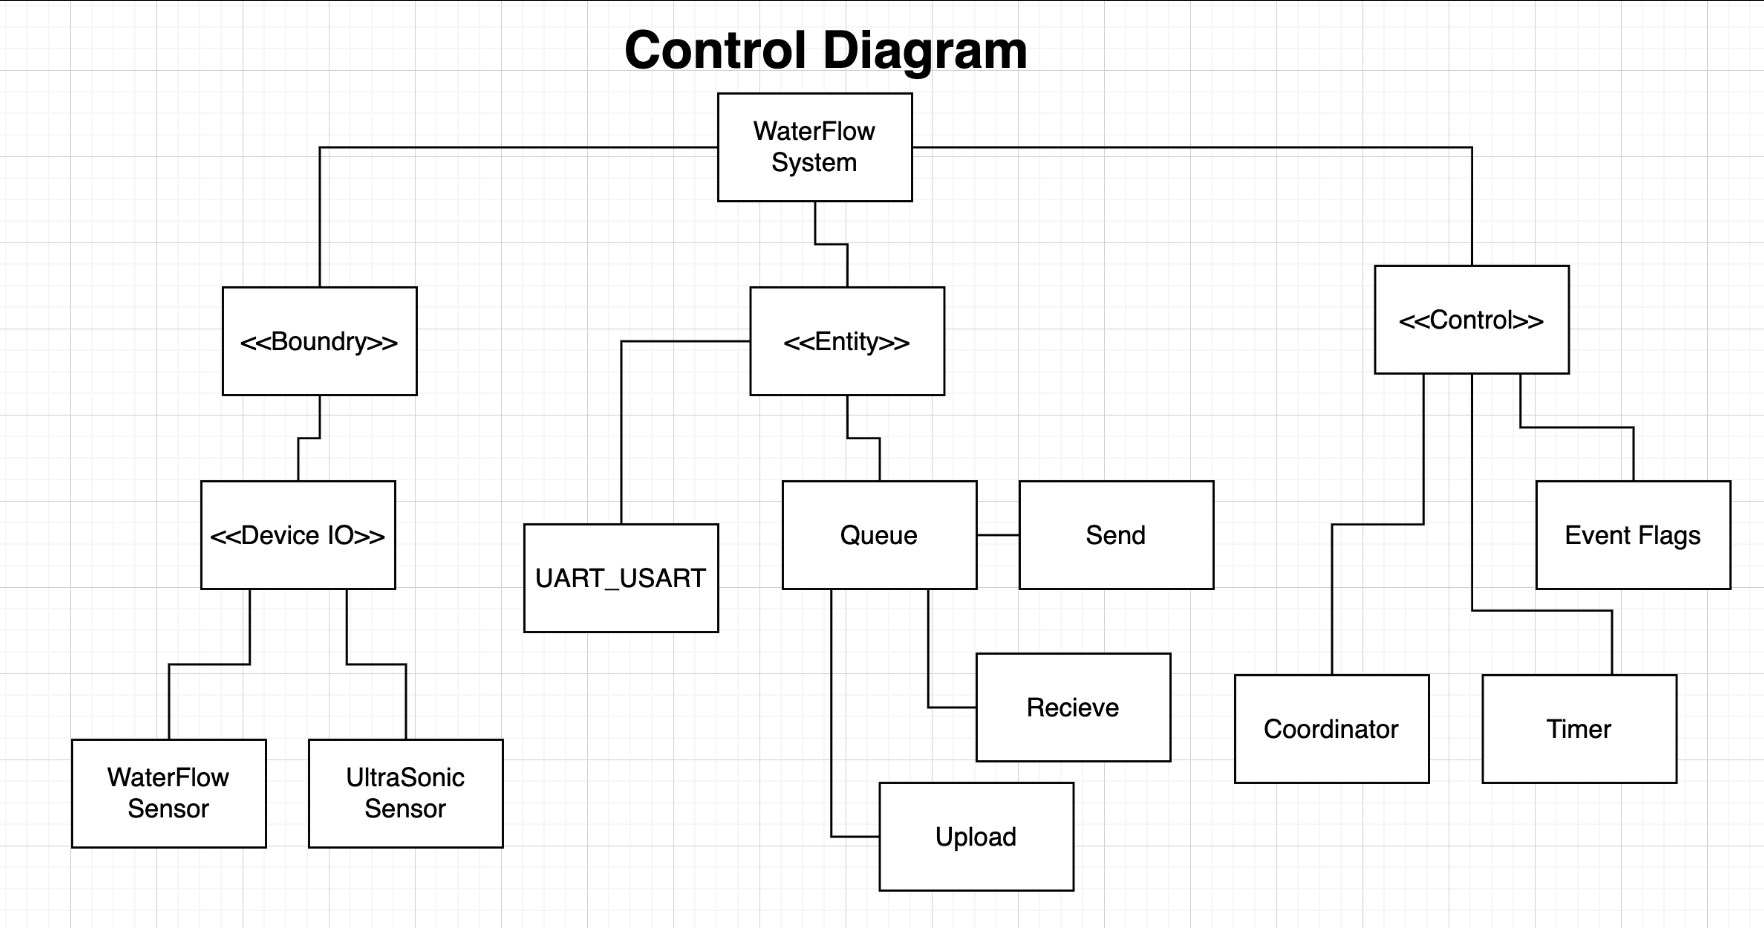

### <span style="color:blue">State Dependent</span>
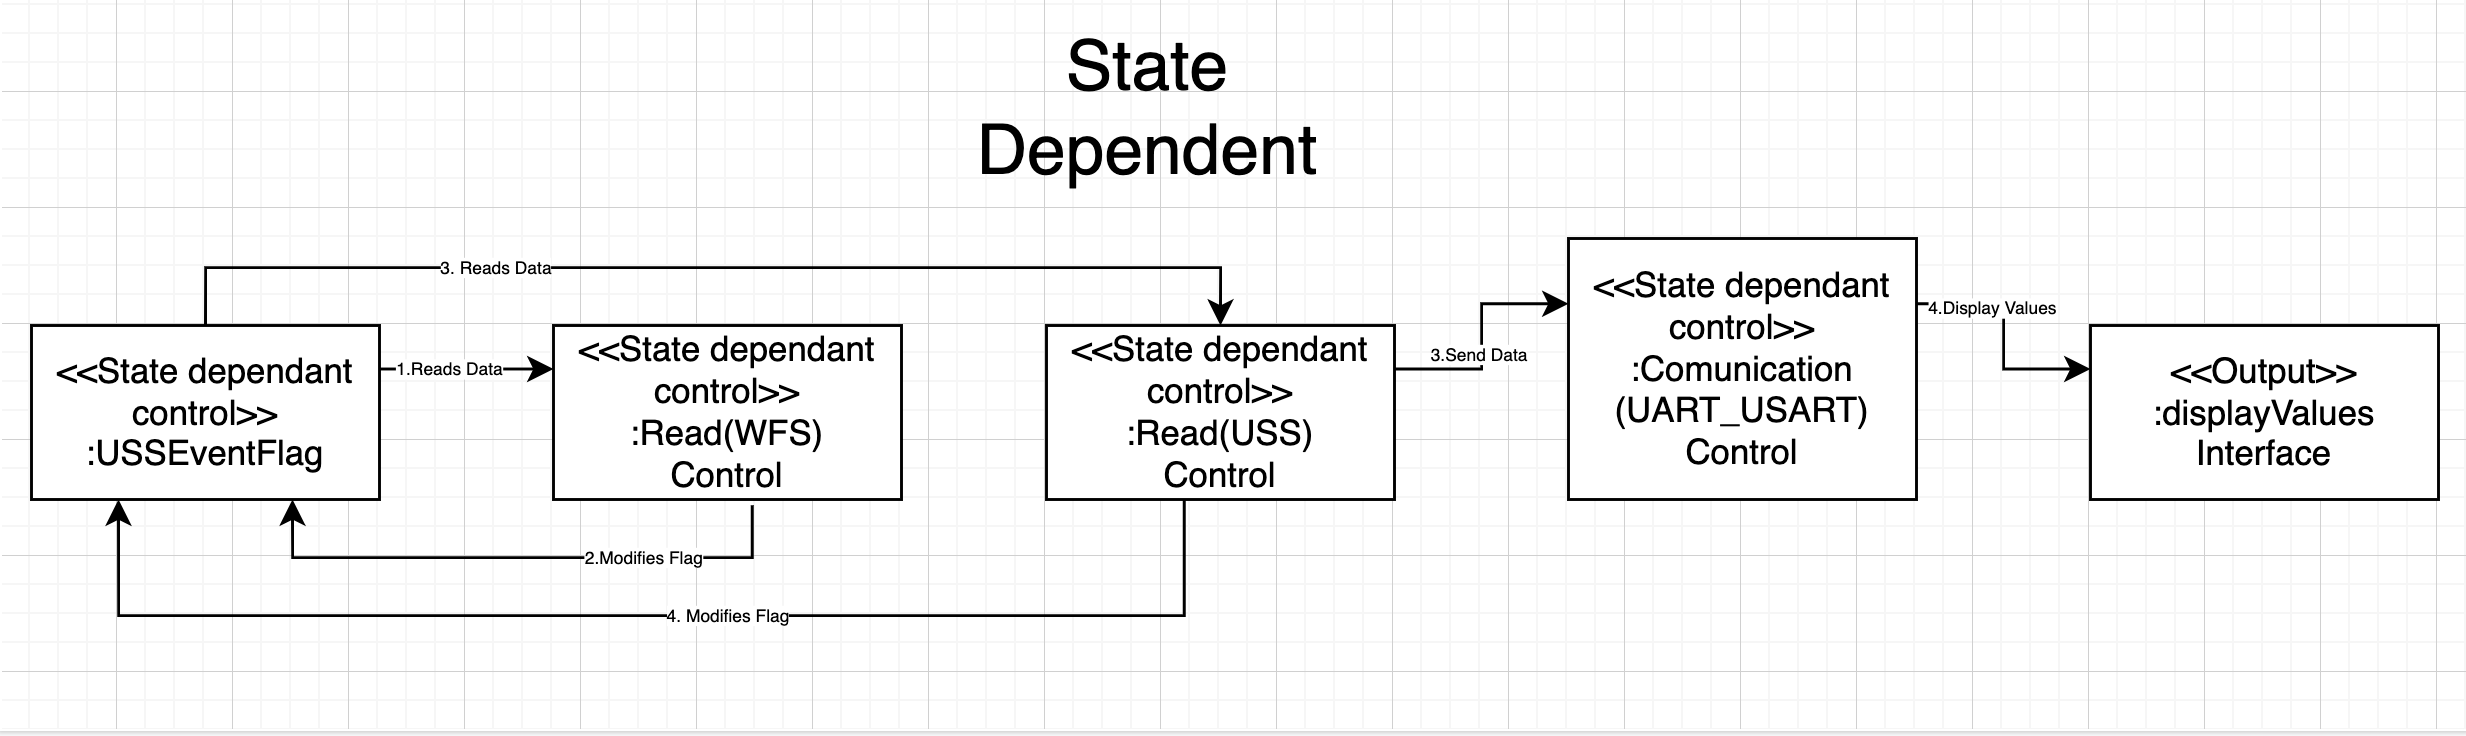

### <span style="color:blue">Colaborative Model</span>
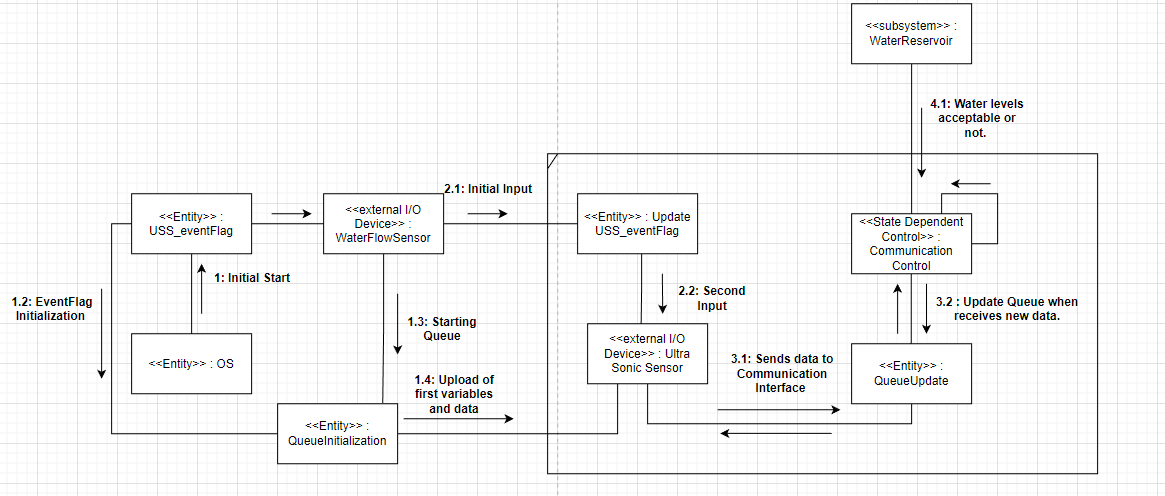

### <span style="color:blue">Software components</span>









### Setting Up The Pins
The function "MX_GPIO_Init" enables and sets all needed pins to an initially deasserted state, so that they can be used in the rest of the program.


```
C
static void MX_GPIO_Init(void)
{
  GPIO_InitTypeDef GPIO_InitStruct = {0};

  /* GPIO Ports Clock Enable /
  HAL_RCC_GPIOH_CLK_ENABLE();
  HAL_RCC_GPIOA_CLK_ENABLE();
  HAL_RCC_GPIOD_CLK_ENABLE();
  HAL_RCC_GPIOB_CLK_ENABLE();

  /Configure GPIO pin Output Level /
  HAL_GPIO_WritePin(GPIOD, GPIO_PIN_14, GPIO_PIN_RESET);

  /Configure GPIO pins : PA6 PA7 /
  GPIO_InitStruct.Pin = GPIO_PIN_6|GPIO_PIN_7;
  GPIO_InitStruct.Mode = GPIO_MODE_INPUT;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  HAL_GPIO_Init(GPIOA, &GPIO_InitStruct);

  /Configure GPIO pin : PD14 /
  GPIO_InitStruct.Pin = GPIO_PIN_14;
  GPIO_InitStruct.Mode = GPIO_MODE_OUTPUT_PP;
  GPIO_InitStruct.Pull = GPIO_NOPULL;
  GPIO_InitStruct.Speed = GPIO_SPEED_FREQ_LOW;
  HAL_GPIO_Init(GPIOD, &GPIO_InitStruct);

}

/ USER CODE BEGIN 4 /

/ USER CODE END 4 /

/ USER CODE BEGIN Header_StartDefaultTask */
/**
  * @brief  Function implementing the defaultTask thread.
  * @param  argument: Not used
  * @retval None
  /
/ USER CODE END Header_StartDefaultTask */




```

```
C
// define task handler
osThreadId WFSTaskhandler;
osThreadId USSTaskhandler;
osThreadId CommTaskhandler;

//define the entry function
void WFSTask_init (void const * argument);
void USSTask_init (void const * argument);
void CommTask_init (void const * argument);



```

```
C
  // define the thread
  osThreadDef(WFSTask, WFSTask_init, osPriorityNormal, 0, 128);
  osThreadDef(USSTask, USSTask_init, osPriorityNormal, 0, 128);
  osThreadDef(CommsTask, CommTask_init, osPriorityNormal, 0, 128);

  // create thread and assign ID
  WFSTaskhandler = osThreadCreate(osThread(WFSTask), NULL);
  USSTaskhandler = osThreadCreate(osThread(USSTask), NULL);
  CommTaskhandler = osThreadCreate(osThread(CommsTask), NULL);


```

#### Creating the Ultra Sonic Sensor Task

The function ```USSTask_init```. This code contains all things necesarry for the activation and control of the UltraSonic Sensor.
It Writes the previously initialized GPIO port that sends a trigger. Once This trigger is sent, we
read the GPIO port connected to the ECHO, the ECHO is and is read once again to determine the distance
with a simple aritmethic equation.
All this happens in a infinite for loop, that only excutes if we have an active flag that is equal to 1
after this routine is done, we modify the flag to 0 and we put the obtained data in queue. The task is Yielded


```
C
void USSTask_init(void const * argument)
{
  /* USER CODE BEGIN 5 */
  /* Infinite loop */
  for(;;)
  {
	  if(USSevent_flag == 1){
	  	HAL_GPIO_WritePin(TRIG_PORT, TRIG_PIN, GPIO_PIN_SET);  // pull the TRIG pin HIGH
	  	__HAL_TIM_SET_COUNTER(&htim1, 0);
	  	while (__HAL_TIM_GET_COUNTER (&htim1) < 20);  // wait for 20 us
	  	HAL_GPIO_WritePin(TRIG_PORT, TRIG_PIN, GPIO_PIN_RESET);  // pull the TRIG pin low

	  	pMillis = HAL_GetTick(); // used this to avoid infinite while loop  (for timeout)
	  	 // wait for the echo pin to go high
	  	while (!(HAL_GPIO_ReadPin (ECHO_PORT, ECHO_PIN)) && pMillis + 10 >  HAL_GetTick());
	  	Value1 = __HAL_TIM_GET_COUNTER (&htim1);

	  	pMillis = HAL_GetTick(); // used this to avoid infinite while loop (for timeout)
	  	 // wait for the echo pin to go low
	  	while ((HAL_GPIO_ReadPin (ECHO_PORT, ECHO_PIN)) && pMillis + 50 > HAL_GetTick());
	  	Value2 = __HAL_TIM_GET_COUNTER (&htim1);

	  	Distance = (Value2-Value1)* 0.034/2;
	  	osMessagePut(myQueueHandle, Distance, 1000);

	  	USSevent_flag = USSevent_flag ^ 1;
	  }
		taskYIELD();


  }
  /* USER CODE END 5 */
}


```

#### Creating the Water Flow Sensor Task

The function ```WFSTask_init```. The Waterflow task is the task that initiates our routine. It begins by readind the previously activated
GPIO pin that connects to the Waterflow sensor. If a change is detected (meaninf activation of the sensor).
The event flag that activates the other sensors is changed to 1, thus triggering our system.
Once this is done, the task breaks from its infite loop, and is delayed for a determined number of ticks.


```
C
void WFSTask_init(void const * argument)
{
  /* USER CODE BEGIN 5 */
	TickType_t tickCount;
	TickType_t frequency = 2000;
	tickCount = xTaskGetTickCount();

  /* Infinite loop */
  for(;;)
  {
	 for(;;)
	 {
	  GPIO_PinState Value3 = HAL_GPIO_ReadPin(Input_Port, Input_Pin);
	  osDelay(1000);
	  GPIO_PinState Value4 = HAL_GPIO_ReadPin(Input_Port, Input_Pin);
	  if(Value3 != Value4){
		  USSevent_flag = USSevent_flag | 1;
		  break;
	  }
	 }
	  vTaskDelayUntil( &tickCount, frequency );
 }
  /* USER CODE END 5 */
}


```

#### Creating the Communcation Task

The function ```CommTask_init```. This task transmits the previously made messege in a queue. This messege is buffered padded with 0
to avoid noise data.
once the read event is done, if a message is detected in the queue, is sent via UART_transmit in huart3
to a mobaXterm client terminal.
once this is done, the task is delayed.

```
C
void CommTask_init(void const * argument)
{
  /* USER CODE BEGIN 5 */
  /* Infinite loop */
	osEvent readState;
	uint8_t msg[BUFF_SZ] = {0};
	uint8_t padding[BUFF_SZ] = {0};
	char padding_character = '0';
  for(;;)
  {
	readState = osMessageGet(myQueueHandle, osWaitForever);
	if(readState.status == osEventMessage){
		int r = (int)readState.value.v;
		int l = (r == 0)? 1 : log10(r)+1;
		sprintf ((char *)msg, "%s%i\r\n", (char *)memset(padding, padding_character, BUFF_SZ -l), r);
		HAL_UART_Transmit(&huart3, msg, sizeof(msg),100);
	}
	HAL_Delay(2000);
	memset(padding, 0, BUFF_SZ);
  }
  /* USER CODE END 5 */
}

```

## Referencias
STMicroelectronics. (3 de diciembre de 2021). "How to get started with STM32CubeIDE from scratch". STM32 MPU. Recuperado de: https://wiki.st.com/stm32mpu/wiki/How_to_get_started_with_STM32CubeIDE_from_scratch

EasyEDA. (2022). "An Easier and Powerful Online PCB Design Tool". EasyEDA. Recuperado de: https://easyeda.com/

SeedStudio. (26 de junio de 2017). "Water Flow Sensor YF-B5". SeedStudio. Recuperado de: https://media.digikey.com/pdf/Data%20Sheets/Seeed%20Technology/114991175_Web.pdf

ProtoSupplies. (2022). "JSN-SR04T V3.0 Waterproof Ultrasonic Range Finder". ProtoSupplies. Recuperado de: https://protosupplies.com/product/jsn-sr04t-v3-0-waterproof-ultrasonic-range-finder/

OpenBikeSensor. (s.f.) "JSN-SR04T - All-in-one ultrasonic distance measurement instruction manual". Recuperado de: https://www.openbikesensor.org/docs/hardware/general/collective-order/jsn-sr04t-en.pdf

STMicroelectronics. (2022). "High-performance access line, Arm Cortex-M4 core with DSP and FPU, 1,5 MByte of Flash memory, 100 MHz CPU, ART Accelerator, DFSDM". ST. Recuperado de: https://www.st.com/en/microcontrollers-microprocessors/stm32f413zh.html#documentation

Stalling, W. (2015). "OPERATING SYSTEMS: INTERNALS AND DESIGN PRINCIPLES".  EIGHTH EDITION ed. Pearson.